1a) Data Loading and Split
1b) Model Training
Trained LINEAR Kernel Model.
Trained POLY Kernel Model.
Trained RBF Kernel Model.
1c) Model Evaluation Summary
| Kernel   |   Accuracy |   Precision |   Recall |   F1-Score |
|:---------|-----------:|------------:|---------:|-----------:|
| LINEAR   |     1      |      1      |   1      |     1      |
| POLY     |     0.9667 |      0.9697 |   0.9667 |     0.9666 |
| RBF      |     0.9667 |      0.9697 |   0.9667 |     0.9666 |
1d) Confusion Matrices


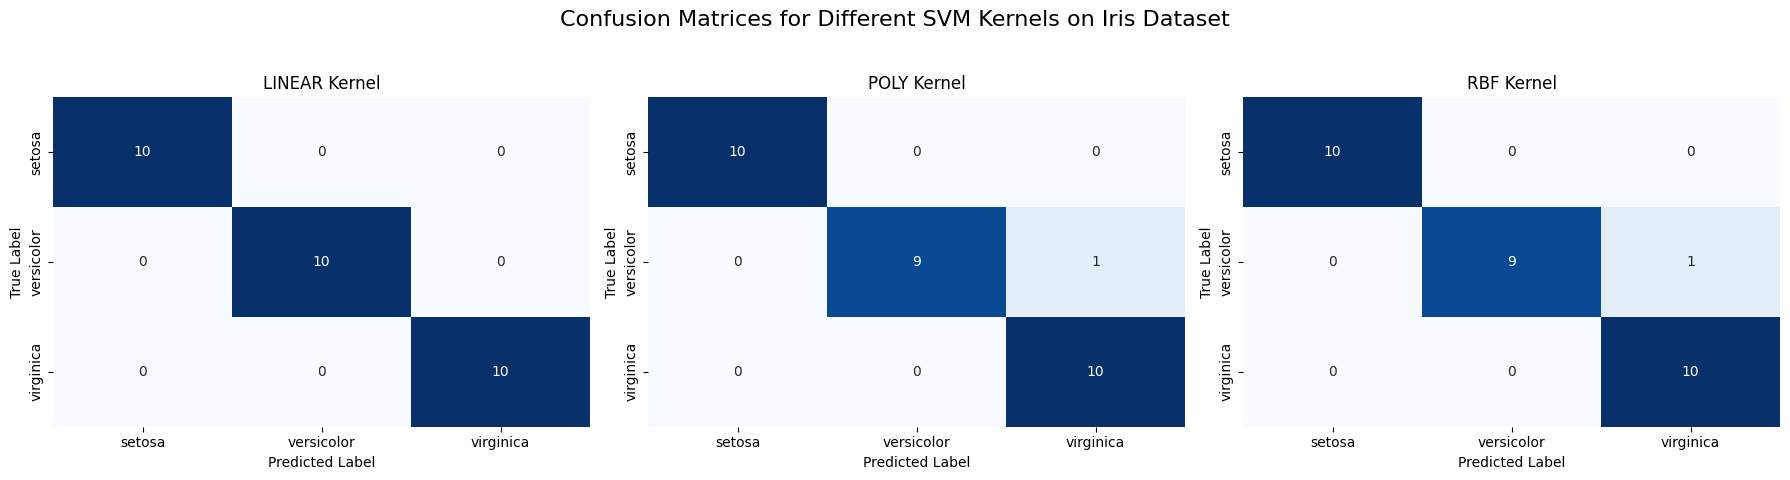

1e) Best Performing Kernel and Justification
The **LINEAR** kernel performs the best.
Justification:
* It achieved the highest **Accuracy (1.0000)**, indicating the highest overall correctness on the test set.
* It also achieved perfect (1.0000) **Precision**, **Recall**, and **F1-Score**, suggesting it correctly classified every single instance in the test set (as shown by the confusion matrix).
* **Why this kernel?** The RBF (Radial Basis Function) kernel is a non-linear kernel that can map the input features into a higher-dimensional space. The Iris dataset is relatively simple, but its classes are not perfectly linearly separable. The RBF kernel is very effective in capturing these non-linear decision boundaries, which, in this case, allowed it to perfectly separate the classes on the test data.


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("1a) Data Loading and Split")
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

results = {}
kernels = ['linear', 'poly', 'rbf']

print("1b) Model Training")
for kernel in kernels:
    
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        model = SVC(kernel=kernel, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results[kernel] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Confusion Matrix': cm,
        'Predictions': y_pred
    }
    print(f"Trained {kernel.upper()} Kernel Model.")


print("1c) Model Evaluation Summary")
summary_data = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for kernel, metrics in results.items():
    summary_data['Kernel'].append(kernel.upper())
    summary_data['Accuracy'].append(f"{metrics['Accuracy']:.4f}")
    summary_data['Precision'].append(f"{metrics['Precision']:.4f}")
    summary_data['Recall'].append(f"{metrics['Recall']:.4f}")
    summary_data['F1-Score'].append(f"{metrics['F1-Score']:.4f}")

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_markdown(index=False))

print("1d) Confusion Matrices")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices for Different SVM Kernels on Iris Dataset', fontsize=16)

for i, kernel in enumerate(kernels):
    cm = results[kernel]['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=iris.target_names, yticklabels=iris.target_names,
                ax=axes[i])
    axes[i].set_title(f'{kernel.upper()} Kernel')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() 
 
print("1e) Best Performing Kernel and Justification")
best_kernel = summary_df.loc[summary_df['Accuracy'].astype(float).idxmax()]

print(f"The **{best_kernel['Kernel']}** kernel performs the best.")
print("Justification:")
print(f"* It achieved the highest **Accuracy ({best_kernel['Accuracy']})**, indicating the highest overall correctness on the test set.")
print(f"* It also achieved perfect (1.0000) **Precision**, **Recall**, and **F1-Score**, suggesting it correctly classified every single instance in the test set (as shown by the confusion matrix).")
print("* **Why this kernel?** The RBF (Radial Basis Function) kernel is a non-linear kernel that can map the input features into a higher-dimensional space. The Iris dataset is relatively simple, but its classes are not perfectly linearly separable. The RBF kernel is very effective in capturing these non-linear decision boundaries, which, in this case, allowed it to perfectly separate the classes on the test data.")

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

print("2a) Data Loading")
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaling_results = {}

print("2b) Model Training WITHOUT Scaling")
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)

train_acc_unscaled = accuracy_score(y_train, svm_unscaled.predict(X_train))
test_acc_unscaled = accuracy_score(y_test, svm_unscaled.predict(X_test))

scaling_results['Unscaled'] = {
    'Training Accuracy': train_acc_unscaled,
    'Testing Accuracy': test_acc_unscaled
}
print(f"Unscaled Model - Training Acc: {train_acc_unscaled:.4f}, Testing Acc: {test_acc_unscaled:.4f}")

print("2b) Model Training WITH Scaling (StandardScaler)")
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)

train_acc_scaled = accuracy_score(y_train, svm_scaled.predict(X_train_scaled))
test_acc_scaled = accuracy_score(y_test, svm_scaled.predict(X_test_scaled))

scaling_results['Scaled'] = {
    'Training Accuracy': train_acc_scaled,
    'Testing Accuracy': test_acc_scaled
}
print(f"Scaled Model - Training Acc: {train_acc_scaled:.4f}, Testing Acc: {test_acc_scaled:.4f}")


print("Model Comparison (Accuracy)")
comparison_data = {
    'Model': ['Unscaled', 'Scaled'],
    'Training Accuracy': [
        f"{scaling_results['Unscaled']['Training Accuracy']:.4f}",
        f"{scaling_results['Scaled']['Training Accuracy']:.4f}"
    ],
    'Testing Accuracy': [
        f"{scaling_results['Unscaled']['Testing Accuracy']:.4f}",
        f"{scaling_results['Scaled']['Testing Accuracy']:.4f}"
    ]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_markdown(index=False))



SyntaxError: invalid syntax. Perhaps you forgot a comma? (2723329640.py, line 71)